### Team APOGEE
#### April 14, 2024


## Introduction
Google Play Store, the digital distribution service by Google, stands as a cornerstone in the Android app ecosystem, offering a myriad of apps, books, music, and more. As the official marketplace for Android users, it serves as a hub for developers to showcase their creations, whether free or paid.
Despite the vastness of the Google Play Store and its significance in the Android world, exploring its data presents unique challenges. Unlike the Apple App Store, Google Play Store data is more challenging due to dynamic page loading techniques like JQuery.
 
The Play Store is a significant platform for Android app developers, offering vast potential for app-making businesses to thrive. By extracting actionable insights from the available data, developers can gain valuable knowledge to capture the Android market successfully. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

## Objectives:

- **Data Loading**: We start by loading the dataset into a Spark DataFrame, setting the stage for all subsequent analysis.
- **Schema Review**: We examine and display the schema of the data, identifying and implementing necessary modifications to optimize the structure for analysis.
- **Data Transformation**: Transformations are applied to the data to enhance its accuracy and usability.
- **Persistent Storage**: The transformed data is stored in a persistent table, ensuring it remains accessible and maintainable for future analyses.
- **Temporary View Creation**: A temporary view of the data is established, allowing for SQL-like operations which are familiar and powerful for data exploration.
- **Data Exploration**: Through Spark SQL, we conduct comprehensive data exploration to identify key trends, patterns, and insights, aiming to understand the intricacies of app popularity and user engagement within the Google Play Store.

## Data Description
This data represents information about various mobile applications from the Google Play Store. Each row corresponds to a specific app and contains details such as the app name (App), category (Category), rating (Rating), number of reviews (Reviews), size (Size), number of installs (Installs), price (Price), content rating (Content Rating), genres (Genres), last updated date (Last Updated), current version (Current Ver), and required Android version (Android Ver). The data provides insights into app characteristics, user feedback, and popularity metrics.
 
#### Dataset details
- Source: The dataset is from Kaggle - Google Play Store Apps. <br>
It contains 10k of web scraped Play Store apps data for analysing the Android market. <br>
Link : https://www.kaggle.com/datasets/lava18/googleplay-store-apps
- Dimensions: (10841, 13)
- Features:
    1. App: Name of the app
    2. Category: Category of the app (e.g., ART_AND_DESIGN, FINANCE, COMICS, BEAUTY,etc.)
    3. Rating: Current average rating (out of 5) on Google Play
    4. Reviews: Number of user reviews given on the app
    5. Size: Size of the app in MB (megabytes)
    6. Installs: Number of times the app was downloaded from Google Play
    7. Type: Whether the app is paid or free
    8. Price: Price of the app in US dollars
    9. Last Updated: Date on which the app was last updated on Google Play

## Step 1 : Create Session
Let's start by initializing the SparkContext object, sc, which serves as the entry point for Spark functionality

In [0]:
# SparkContext object 
sc = spark.sparkContext

In [0]:
spark 

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

This output shows our Spark environment setup. It's using SparkSession with Hive support, allowing interaction with Hive data. SparkContext manages connections to the Spark cluster, and Spark UI provides a monitoring dashboard. Version v3.3.2 is running locally with 8 threads, and the app is named "Databricks Shell".

## Step 2 : Import
Importing required libraries

In [0]:
# import only required libraries used for data analysis and visualization tasks in this notebook
import pandas as pd
from pyspark.sql.functions import col
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import col, when, regexp_extract
from pyspark import StorageLevel
import matplotlib.pyplot as plt
import seaborn as sns

## Step 3 : Load Data
Load the dataset and display the first few rows 

In [0]:
# Read the file into a Spark DataFrame
df_spark = spark.read.csv("/FileStore/tables/googleplaystore.csv", header=True, inferSchema=True)
df = df_spark.toPandas()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


So here we see all information about various mobile applications from the Google Play Store, , including categories, ratings, reviews, sizes, installs, types, prices, content ratings, genres, update dates, current versions, and Android compatibility.

## Step 4 : Explore data

In [0]:
# Count the number of rows
num_rows = df_spark.count()
# Get the number of columns
num_columns = len(df_spark.columns)
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 10841
Number of Columns: 13


We are calculating and displaying the total number of rows and columns in our DataFrame. Specifically, it shows that there are 10,841 rows and 13 columns, providing us with a clear initial understanding of our dataset's dimensions.

In [0]:
#Display dataframe
df_spark.show()

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|      Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design|   January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|  January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|    August 1, 2018|             1.2.4|4.0.3 

### Schema of the data

In [0]:
# display schema
df_spark.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



This `df_spark.printSchema()` command outputs the structure of the DataFrame `df_spark`, detailing the schema of the dataset loaded from the Google Play Store. This schema outline confirms that all columns are currently treated as strings (`string` type) and are nullable, indicating they can contain null values. The dataset consists of 13 fields: App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver. This display is crucial for understanding the data types of each column and helps identify if any type conversions or schema modifications are necessary for further analysis or processing tasks.
Here we observe that all columns are currently of string data type (string (nullable = true)). Depending on the data, we may need to convert some columns to more appropriate data types for analysis and processing.

### Data Standardization
Now We are standardizing the column names within our DataFrame, `df_spark`, to enhance our data handling and processing efficiency. First, we define a new set of column names where each original name is transformed to lowercase and spaces are replaced with underscores. This step ensures that all column names adhere to a consistent format, which improves both readability and the ease of programmatically accessing these columns. For instance, a column originally named "Last Updated" would be renamed to "last_updated". Following this, we apply these revised names to our DataFrame using the `select` function, which effectively updates `df_spark` by incorporating these new aliases. This transformation is essential for avoiding issues related to case sensitivity and spaces in column names, particularly when executing SQL queries or performing DataFrame operations, thereby maintaining a streamlined and error-free coding environment.

In [0]:
# Define the new column names with lowercased and underscored names
new_column_names = [col(col_name).alias(col_name.lower().replace(' ', '_')) for col_name in df_spark.columns]
# Select the DataFrame with the new column names
df_spark = df_spark.select(*new_column_names)

In [0]:
df_spark.show()

+--------------------+-------------------+------+--------+------------------+---------+----+-----+--------------+--------------------+------------------+------------------+------------------+
|                 app|           category|rating| reviews|           size_MB| installs|type|price|content_rating|              genres|      last_updated|       current_ver|       android_ver|
+--------------------+-------------------+------+--------+------------------+---------+----+-----+--------------+--------------------+------------------+------------------+------------------+
|            Township|             FAMILY|   4.6| 4451317|Varies with device| 50000000|Free|  0.0|      Everyone|              Casual|     July 19, 2018|             5.9.0|      4.0.3 and up|
|      Cathay Pacific|   TRAVEL_AND_LOCAL|   3.3|    4069|              50.0|  1000000|Free|  0.0|      Everyone|      Travel & Local|     July 25, 2018|             6.6.1|        4.3 and up|
|            Dr. 2048|             FAMIL

All column names in df_spark are now in lowercase and have spaces replaced by underscores. This standardizes naming conventions across the DataFrame, making it easier to reference columns.

### Data Types of columns

In [0]:
print('Columns overview')
pd.DataFrame(df_spark.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,app,string
1,category,string
2,rating,string
3,reviews,string
4,size,string
5,installs,string
6,type,string
7,price,string
8,content_rating,string
9,genres,string


Now, we create a new Pandas DataFrame that effectively showcases the data types of each column within our Spark DataFrame, `df_spark`. We achieve this by passing `df_spark.dtypes`, which is a list of tuples where each tuple contains the column name and its corresponding data type, to the Pandas DataFrame constructor. 
Since we see all are in string format, it indicates that we'll need to convert some of these columns to more appropriate data types to facilitate effective data analysis.

### Duplicate Values
By doing this, we ensure that each app is represented only once in our dataset, eliminating any potential skewness or redundancy in our analysis caused by duplicate data entries. This is crucial for maintaining the accuracy of our analysis, as duplicates could lead to erroneous conclusions about the popularity or user ratings of an app. Moreover, reducing the dataset size by removing duplicates also helps in improving the performance of our data processing tasks, making our operations more efficient.

In [0]:
# Find duplicate rows based on the 'app' column
#duplicate_rows = df_spark.groupBy('app').count().filter('count > 1')
# Drop duplicate rows based on the 'app' column
df_spark = df_spark.dropDuplicates(['app'])

Now, We are checking number of rows in dataframe after removing duplicates.

In [0]:
#Counting rows
df_spark.count()

Out[11]: 9660

### Null values in columns

Now we are assessing the quality of our data by calculating the number of null values in each column of our DataFrame, `df_spark`. By understanding where nulls are concentrated, we can make informed decisions about necessary data preprocessing steps, such as imputation or exclusion of certain data. 

In [0]:
# Checking Null Values in each column using count() and when() functions
col_null_cnt_df =  df_spark.select([count(when(col(c).isNull(),c)).alias(c) for c in df_spark.columns])
display(col_null_cnt_df)

app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,0,0,0,0,0,0,0,1,0,0,1,1


So we see that the columns : content_rating, current_ver and android_ver have null values. We will handle these missing values during data preprocessing.

## Step 5: Data Preprocessing

In EDA we saw that there are some missing values in come columns. We will drop such data in our dataframe. we execute the command df_spark = df_spark.dropna() to remove any rows in our DataFrame df_spark that contain null values. Firstly, it ensures the integrity and quality of our dataset by eliminating potential sources of bias or error in our analysis, as null values can skew statistical results. Secondly, it simplifies subsequent data analysis processes by obviating the need for ongoing null checks and handling, allowing us to focus on the analysis itself. 

In [0]:
# Drop rows with any null value
df_spark = df_spark.dropna()

In [0]:
#Checking the size after dropping null values
#Count the number of rows
num_rows = df_spark.count()
# Get the number of columns
num_columns = len(df_spark.columns)
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 9658
Number of Columns: 13


Now, First, we converted the 'reviews' column to the 'int64' data type. Next, we cleaned the 'price' column by removing the '$' sign and converting it to float. Then, we sanitized the 'installs' column by removing special characters like '+', and converted it to integer type. After that, we replaced 'NaN' strings in the 'rating' column with actual null values and calculated the average rating. Finally, we replaced the 'NaN' values with the calculated average rating, converted them to float, and rounded them to one decimal place.

In [0]:
# Convert 'reviews' column to 'int64' data type
df_spark = df_spark.withColumn('reviews', df_spark['reviews'].cast(IntegerType()))

# Remove '$' from the 'price' column as price is in Dollars and then convert to Float
df_spark = df_spark.withColumn('price', regexp_replace(df_spark['price'], '\$', ''))
df_spark = df_spark.withColumn('price', df_spark['price'].cast('float'))

# Remove special characters from the 'installs' columns as it has '+' in values and then convert to integer
df_spark = df_spark.withColumn('installs', regexp_replace(df_spark['installs'], '[+,]', ''))
df_spark = df_spark.withColumn('installs', df_spark['installs'].cast('integer'))

# Replace 'NaN' strings with actual null values and calculate average rating
average_rating = df_spark.filter(col('rating') != 'NaN').select(avg(col('rating'))).collect()[0][0]
# Replace 'NaN' values with the average rating, convert to float, and round to one decimal place
df_spark = df_spark.withColumn('rating', round(when(col('rating') != 'NaN', col('rating').cast('float')).otherwise(average_rating), 1))

Now, We're filtering a DataFrame in Spark using PySpark to retain rows where the 'size' column ends with either 'k', 'M', or 'Varies with device'. By applying a regular expression pattern, we exclude rows with other endings. The resulting DataFrame, df_spark_filtered, showcases the outcome of this filtering process.

In [0]:
#The sizes are either in KB (k), MB(M) or Varies with device
# Filter rows where 'size' column does not contain 'k', 'M', or 'Varies with device' at the end
df_spark_filtered = df_spark.filter(~col('size').rlike('[k,M,Varies with device]$'))
# Display the first few rows
df_spark_filtered.show()

+--------------------+-------------+------+-------+-------------------+--------+------+-----+--------------+------+------------+-----------+-----------------+
|                 app|     category|rating|reviews|               size|installs|  type|price|content_rating|genres|last_updated|current_ver|      android_ver|
+--------------------+-------------+------+-------+-------------------+--------+------+-----+--------------+------+------------+-----------+-----------------+
|"Women""s Health ...|         Face|  null|   null| HEALTH_AND_FITNESS|       4|  2509| null|    1,000,000+|  Free|           0| Mature 17+| Health & Fitness|
|"Yanosik: ""antyr...| traffic jams|  null|   null|MAPS_AND_NAVIGATION|       4|102248| null|    5,000,000+|  Free|           0|   Everyone|Maps & Navigation|
+--------------------+-------------+------+-------+-------------------+--------+------+-----+--------------+------+------------+-----------+-----------------+



We're removing problematic rows from the DataFrame df_spark by excluding all rows that exist in the df_spark_filtered DataFrame. This ensures that any rows not meeting our filtering criteria are deleted from the original DataFrame. Finally, we're counting the number of rows remaining in df_spark after the deletion process.

In [0]:
# Delete problematic rows from df_spark
df_spark = df_spark.exceptAll(df_spark_filtered)
df_spark.count()

Out[17]: 9656

Now, We're focusing on the 'size' column within the df_spark DataFrame. Our goal is to standardize the representation of sizes by converting values from kilobytes (KB) to megabytes (MB) where applicable. To achieve this, we employ a conditional logic using PySpark's when function. If the 'size' contains 'k', we extract the numeric value using a regular expression, convert it to a double, and then divide by 1000 to convert KB to MB. Similarly, if the 'size' contains 'M', we simply extract the numeric value and cast it to double, as it's already in MB. For any other cases where the 'size' doesn't contain 'k' or 'M', it remains unchanged. This meticulous transformation ensures consistency in the representation of sizes throughout the DataFrame, facilitating clearer analysis and interpretation of the data.

In [0]:
# Convert 'size' values from KB to megabytes (MB)
df_spark = df_spark.withColumn('size', 
                                when(col('size').contains('k'), 
                                     regexp_extract(col('size'), r'(\d+)', 1).cast('double') / 1000)
                                .when(col('size').contains('M'), 
                                     regexp_extract(col('size'), r'(\d+)', 1).cast('double'))
                                .otherwise(col('size')))


In [0]:
#Apps sizes have 'M' which stands for MB (Megabytes)
# Filter rows where 'size' column does not contain 'M'
df_spark = df_spark.filter(~col('size').like('%M%'))
# Display the first few rows
df_spark.count()

Out[19]: 9656

We're renaming the 'size' column in the DataFrame df_spark to 'size(MB)' to provide a clearer indication of the units used. This change helps enhance the readability and understanding of the data.

In [0]:
# Rename the 'size' column to 'size(MB)'
df_spark = df_spark.withColumnRenamed('size', 'size_MB')
df_spark.toPandas().head(20)

,app,category,rating,reviews,size_MB,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,AJ렌터카 법인 카셰어링,MAPS_AND_NAVIGATION,4.2,0,27.0,10,Free,0.00,Everyone,Maps & Navigation,"July 30, 2018",1.0.0.0,4.3 and up
1,American Sniper City Fight Shooting Assassin,GAME,4.1,395,54.0,50000,Free,0.00,Teen,Action,"November 24, 2017",1.4,2.3 and up
2,Arabic Alphabets,PARENTING,4.2,34,6.0,10000,Free,0.00,Everyone,Parenting,"January 9, 2017",1.0,2.2 and up
3,BET NOW - Watch Shows,ENTERTAINMENT,4.2,14807,19.0,1000000,Free,0.00,Teen,Entertainment,"July 8, 2018",11.45.0,4.4 and up
4,BG Cable TV,FAMILY,4.2,5,2.0,1000,Free,0.00,Everyone,Entertainment,"February 25, 2018",1.0,4.1 and up
5,BG Television,FAMILY,4.2,3,2.0,500,Free,0.00,Everyone,Entertainment,"December 10, 2017",1.0,4.1 and up
6,BTS J-Hope Wallpaper HD for KPOP Fans,PERSONALIZATION,4.2,4,3.0,500,Free,0.00,Everyone,Personalization,"July 26, 2018",2.1.4,4.0 and up
7,Bokeh (Background defocus),PHOTOGRAPHY,4.0,50109,Varies with device,10000000,Free,0.00,Everyone,Photography,"June 7, 2018",Varies with device,Varies with device
8,Bomb and Nade Timer for CS:GO,PRODUCTIVITY,2.6,85,6.0,5000,Free,0.00,Everyone,Productivity,"April 21, 2016",1.1.2,4.0 and up
9,CB Heroes,SOCIAL,5.0,5,1.0,5,Free,0.00,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up


In [0]:
df_spark.printSchema()

root
 |-- app: string (nullable = true)
 |-- category: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- reviews: integer (nullable = true)
 |-- size_MB: string (nullable = true)
 |-- installs: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- price: float (nullable = true)
 |-- content_rating: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- last_updated: string (nullable = true)
 |-- current_ver: string (nullable = true)
 |-- android_ver: string (nullable = true)



Now, the datatype of the columns have been changed thoroughly. 
Above displays the schema of the DataFrame `df_spark`, here's the breakdown:

- The 'app' column is of type string, representing the name of the application.
- 'category' is also a string column, indicating the category to which the application belongs.
- 'rating' is a double column, storing the rating of the application.
- 'reviews' is an integer column, holding the number of reviews received by the application.
- 'size_MB' is a string column, denoting the size of the application in megabytes (MB).
- 'installs' is an integer column, representing the number of installations of the application.
- 'type' is a string column, indicating whether the application is free or paid.
- 'price' is a float column, indicating the price of the application.
- 'content_rating' is a string column, specifying the content rating of the application.
- 'genres' is a string column, listing the genres associated with the application.
- 'last_updated' is a string column, representing the date when the application was last updated.
- 'current_ver' is a string column, indicating the current version of the application.
- 'android_ver' is a string column, specifying the required Android version for the application.

## Step 6 : Data Visualization

### Distribution of apps across different categories.


1. **Grouping by Category**: First up, we use Spark to group all the apps by their category and count how many apps fall into each category.
2. **Data Extraction**: Next, we pull out the category names and their counts from the grouped data and stash them in lists for easy access.
3. **Plotting Time**: We then throw these numbers onto a bar chart using Matplotlib. We set up the chart with a nice big size, paint the bars blue, slap on labels for the categories and counts, and title it 'Counts of Apps by Category'. We also rotate the category labels on the x-axis so they don’t get crammed together.


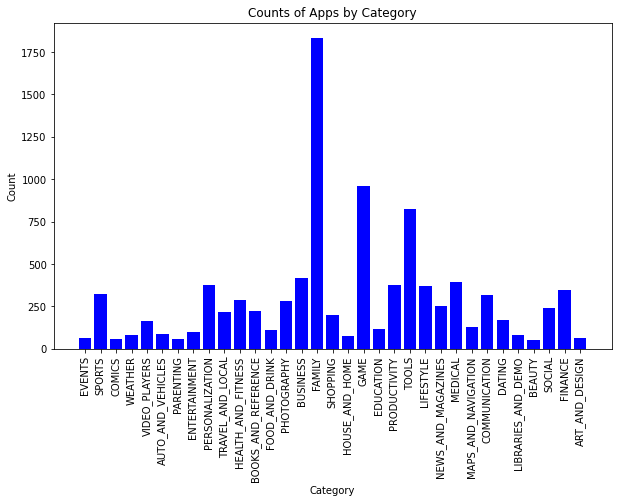

In [0]:
# Collect the counts for each category
category_counts = df_spark.groupBy('category').count().collect()

# Extract categories and counts from collected data
categories = [row['category'] for row in category_counts]
counts = [row['count'] for row in category_counts]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='blue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Apps by Category')
plt.xticks(rotation=90)
plt.show()

This bar chart displays the number of apps within each category on the Google Play Store. It shows a significant variation in count among categories, with some categories like 'Family' and 'Game' having a notably higher count of apps compared to others. Categories are listed along the x-axis, and the y-axis represents the count of apps. The chart reveals the relative popularity or saturation of categories in the Play Store based on the number of apps they contain.

### Correlation : Identify potential patterns or dependencies in the data.

Now, We commence by converting a PySpark DataFrame into a Pandas DataFrame to leverage the robust analytical capabilities of Pandas. Subsequently, we utilize Seaborn to construct a heatmap that elucidates the correlations among the numerical columns within our dataset. The heatmap is rendered with annotations to indicate the correlation coefficients, precise to two decimals, and features distinct lines between cells for enhanced readability. This visualization serves as an instrumental tool for discerning the relationships and patterns between the different numerical variables.


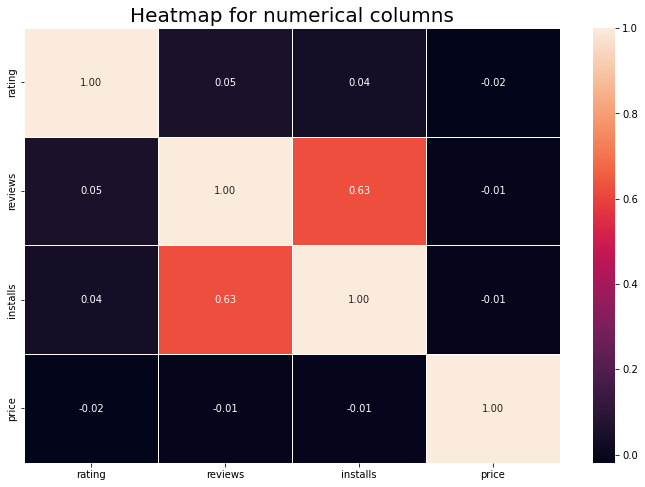

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
df_pandas = df_spark.toPandas()

# Plot heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_pandas.corr(), annot=True, linewidths=0.5, fmt=".2f")
plt.title("Heatmap for numerical columns", size=20)
plt.show()

The heatmap provides a visual representation of the correlation matrix for numerical columns, such as rating, reviews, installs, and price, in a dataset. Notably, there is a moderately positive correlation (0.63) between the number of reviews and installs, suggesting that apps with more installations tend to have more reviews. The other variables show low to negligible correlations with each other, as indicated by the dark shades on the heatmap. The color bar on the right acts as a legend, ranging from -1 to 1, which corresponds to a perfect negative correlation to a perfect positive correlation.

## Step 7: Store the data in a persistent table

Now, We are executing data persistence operations on our Spark DataFrame df_spark which contains cleaned data pertaining to Google Play Store applications

In [0]:
df_spark.write.saveAsTable("Google_Cleaned_Data" , mode='overwrite')

1. **Saving Data**: The `df_spark.write.saveAsTable("Google_Cleaned_Data", mode='overwrite')` command is saving our DataFrame into a table named "Google_Cleaned_Data" within Spark SQL. By setting the mode to 'overwrite', we ensure that if a table with the same name already exists, it will be replaced with the current DataFrame's contents. This is beneficial for ensuring that the most recent version of our cleaned data is readily accessible for future queries and operations without the need to repeat the cleaning process.

In [0]:
df_spark.is_cached

Out[25]: False


2. **Cache Check**: The `df_spark.is_cached` query returns a boolean indicating whether our DataFrame is currently stored in cache. This is a check to understand if our DataFrame is already persisting in memory, which can speed up subsequent operations performed on the data.

In [0]:
df_spark.persist()

Out[26]: DataFrame[app: string, category: string, rating: double, reviews: int, size_MB: string, installs: int, type: string, price: float, content_rating: string, genres: string, last_updated: string, current_ver: string, android_ver: string]


3. **Persistence**: Finally, by calling `df_spark.persist()`, we instruct Spark to keep the DataFrame in memory (or store it on disk if memory is insufficient), allowing for faster access to the data during iterative or repeated actions. This is particularly useful when performing multiple actions on the same dataset, as it avoids the need to recompute the entire DataFrame from the original data source, thus saving on computation time and resources. 

In [0]:
df_spark.is_cached

Out[27]: True

Overall, these steps are key in optimizing performance for data analysis and ensuring data integrity by maintaining a single, clean source of truth that can be efficiently queried.

## Step 8: Create temporary view of the data

In [0]:
# Register the DataFrame as a temporary view
df_spark.createOrReplaceTempView("view_google_play_store")

Now, We are utilizing the DataFrame API to register `df_spark` as a temporary view within Spark SQL's in-memory catalog. The method `createOrReplaceTempView("view_google_play_store")` is called on our DataFrame, which has the effect of naming the view "view_google_play_store". If a view with this name already exists, it will be replaced with the current DataFrame. This temporary view functions similarly to a SQL table that is scoped to the current session and will disappear when the session terminates. It's particularly useful for running SQL queries directly on the data without the overhead of creating a physical table, thereby streamlining our data analysis process. By doing so, we enable SQL-like query access to the data, which is ideal for ad-hoc analysis and can be especially advantageous when integrating with other SQL-based data analysis tools.


In [0]:
%sql
SHOW TABLES

database,tableName,isTemporary
default,google_cleaned_data,false
,view_google_play_store,true


The `%sql` part tells the interpreter that the following command should be interpreted as an SQL statement.
The `SHOW TABLES` SQL statement lists all the tables (both permanent and temporary) available in the current database.

In [0]:
spark.sql("describe view_google_play_store").show(50)

+--------------+---------+-------+
|      col_name|data_type|comment|
+--------------+---------+-------+
|           app|   string|   null|
|      category|   string|   null|
|        rating|   double|   null|
|       reviews|      int|   null|
|       size_MB|   string|   null|
|      installs|      int|   null|
|          type|   string|   null|
|         price|    float|   null|
|content_rating|   string|   null|
|        genres|   string|   null|
|  last_updated|   string|   null|
|   current_ver|   string|   null|
|   android_ver|   string|   null|
+--------------+---------+-------+



The command `spark.sql("describe view_google_play_store").show(50)` initiates an SQL query that invokes the `describe` statement on the temporary view named `view_google_play_store`. This action reveals the view's detailed schema, enumerating all the columns, their respective data types, and any associated comments.

## Step 9 : Data exploration using Spark SQL

The command `spark.sql("SELECT * FROM view_google_play_store").show()` executes a fundamental SQL query that retrieves all the data from the `view_google_play_store` temporary view and then displays it. By issuing the `SELECT *`, we're asking Spark to select every column from the view. The `show()` method is then invoked to output the data, providing a quick snapshot of the entire dataset as currently structured in the view.

In [0]:
# Execute the SQL query and display the results
spark.sql("SELECT * FROM view_google_play_store").show()

+--------------------+-------------------+------+--------+------------------+---------+----+-----+--------------+--------------------+------------------+------------------+------------------+
|                 app|           category|rating| reviews|           size_MB| installs|type|price|content_rating|              genres|      last_updated|       current_ver|       android_ver|
+--------------------+-------------------+------+--------+------------------+---------+----+-----+--------------+--------------------+------------------+------------------+------------------+
|            Township|             FAMILY|   4.6| 4451317|Varies with device| 50000000|Free|  0.0|      Everyone|              Casual|     July 19, 2018|             5.9.0|      4.0.3 and up|
|      Cathay Pacific|   TRAVEL_AND_LOCAL|   3.3|    4069|              50.0|  1000000|Free|  0.0|      Everyone|      Travel & Local|     July 25, 2018|             6.6.1|        4.3 and up|
|            Dr. 2048|             FAMIL

### 1. Count the number of apps in each category

In this command, we're running an SQL query using Spark's SQL functionality to delve deeper into our dataset. The query is `"SELECT category, COUNT(*) AS count FROM view_google_play_store GROUP BY category ORDER BY count DESC"`. This action allows us to select the `category` and the count of records for each category. By applying `GROUP BY category`, we group the data according to app categories, and then with `ORDER BY count DESC`, we sort them so the categories with the most apps are listed first. The `COUNT(*) AS count` part of the query computes the number of apps in each category, and `show()` is used to display these findings.

In [0]:
spark.sql("SELECT category, COUNT(*) AS count FROM view_google_play_store GROUP BY category ORDER BY count DESC").show()

+-------------------+-----+
|           category|count|
+-------------------+-----+
|             FAMILY| 1832|
|               GAME|  959|
|              TOOLS|  827|
|           BUSINESS|  420|
|            MEDICAL|  395|
|    PERSONALIZATION|  376|
|       PRODUCTIVITY|  374|
|          LIFESTYLE|  369|
|            FINANCE|  345|
|             SPORTS|  325|
|      COMMUNICATION|  315|
| HEALTH_AND_FITNESS|  287|
|        PHOTOGRAPHY|  281|
| NEWS_AND_MAGAZINES|  254|
|             SOCIAL|  239|
|BOOKS_AND_REFERENCE|  222|
|   TRAVEL_AND_LOCAL|  219|
|           SHOPPING|  202|
|             DATING|  171|
|      VIDEO_PLAYERS|  163|
+-------------------+-----+
only showing top 20 rows



### 2. Find the top 10 most reviewed apps

In this piece of code, we're leveraging Spark SQL to fetch information about the top 10 most reviewed apps in our dataset. The query `SELECT app, reviews FROM view_google_play_store ORDER BY reviews DESC LIMIT 10` sorts the apps based on the `reviews` column in descending order, which means the apps with the highest number of reviews will come up at the top. By setting a `LIMIT 10`, we restrict the output to just the top 10 records. This gives us a concise list of the apps that have garnered the most user feedback, which can be a proxy for their popularity or user engagement. The `show()` function is then used to display this list. We're using this query to pinpoint the standout apps that are resonating with users.

In [0]:
spark.sql("SELECT app, reviews FROM view_google_play_store ORDER BY reviews DESC LIMIT 10").show()

+--------------------+--------+
|                 app| reviews|
+--------------------+--------+
|            Facebook|78158306|
|  WhatsApp Messenger|69119316|
|           Instagram|66577313|
|Messenger – Text ...|56642847|
|      Clash of Clans|44891723|
|Clean Master- Spa...|42916526|
|      Subway Surfers|27722264|
|             YouTube|25655305|
|Security Master -...|24900999|
|        Clash Royale|23133508|
+--------------------+--------+



### 3. Count the number of apps for each content rating

In this command, we're utilizing Spark SQL to perform a grouped analysis of our dataset based on content ratings. The query `SELECT content_rating, COUNT(*) AS count FROM view_google_play_store GROUP BY content_rating ORDER BY count DESC` focuses on the `content_rating` column. Here, we group the entries by their content ratings, and then count how many apps fall under each rating. By using `ORDER BY count DESC`, we sort these groups so that the ratings with the highest number of apps appear first. This approach helps us understand which content ratings are most common in the dataset, indicating the general target audience of apps in the Google Play Store. We use `show()` to display these results, giving us a clear overview of content rating distribution among the apps.

In [0]:
spark.sql("SELECT content_rating, COUNT(*) AS count FROM view_google_play_store GROUP BY content_rating ORDER BY count DESC").show()

+---------------+-----+
| content_rating|count|
+---------------+-----+
|       Everyone| 7901|
|           Teen| 1036|
|     Mature 17+|  392|
|   Everyone 10+|  322|
|Adults only 18+|    3|
|        Unrated|    2|
+---------------+-----+



### 4. Find the top 10 categories with the highest number of installs

In this query, we're utilizing Spark SQL to analyze the total number of installations per category within our dataset. The command `SELECT category, SUM(CAST(installs AS INT)) AS total_installs FROM view_google_play_store GROUP BY category ORDER BY total_installs DESC LIMIT 10` is structured to calculate the sum of installs, which we explicitly cast to integers to ensure accurate summation. We group the results by `category` to aggregate the installation counts for each category. The query sorts these results in descending order by `total_installs` to highlight the categories with the highest overall user engagement. We limit the output to the top 10 categories to focus on the most significant ones. This provides us with valuable insights into which app categories are the most popular, based on the volume of installations. The `show()` method displays these top categories, effectively summarizing the market's dominant segments.

In [0]:
spark.sql("SELECT category, SUM(CAST(installs AS INT)) AS total_installs FROM view_google_play_store GROUP BY category ORDER BY total_installs DESC LIMIT 10").show()

+------------------+--------------+
|          category|total_installs|
+------------------+--------------+
|              GAME|   13878924415|
|     COMMUNICATION|   11038276251|
|             TOOLS|    8001771915|
|      PRODUCTIVITY|    5793091369|
|            SOCIAL|    5487867902|
|       PHOTOGRAPHY|    4649147655|
|            FAMILY|    4427941505|
|     VIDEO_PLAYERS|    3926902720|
|  TRAVEL_AND_LOCAL|    2894887146|
|NEWS_AND_MAGAZINES|    2369217760|
+------------------+--------------+



### 5. To retrieve "Free" Games from Google Play Store

In this SQL command, we're using Spark SQL to specifically target and analyze apps from the 'GAME' category that are free. The query `SELECT * FROM view_google_play_store WHERE category = 'GAME' AND type = 'Free'` filters our dataset to include only those entries where the `category` is 'GAME' and the `type` is 'Free'. This allows us to isolate and examine the subset of apps that are both in a highly popular category and freely available to users, which are often of high interest both to consumers and market analysts. The use of `show()` at the end of the query displays the data for these specific apps, giving us detailed visibility into the characteristics and metadata of free games on the Google Play Store.

In [0]:
spark.sql("SELECT * FROM view_google_play_store WHERE category = 'GAME' AND type = 'Free'").show()

+--------------------+--------+------+-------+------------------+---------+----+-----+--------------+---------+------------------+------------------+------------------+
|                 app|category|rating|reviews|           size_MB| installs|type|price|content_rating|   genres|      last_updated|       current_ver|       android_ver|
+--------------------+--------+------+-------+------------------+---------+----+-----+--------------+---------+------------------+------------------+------------------+
|      Merge Dragons!|    GAME|   4.5| 214777|              91.0|  5000000|Free|  0.0|      Everyone|   Puzzle|     July 30, 2018|             3.6.0|        4.1 and up|
|Fancy Pants Adven...|    GAME|   4.7|  55952|              61.0|  1000000|Free|  0.0|  Everyone 10+|   Arcade|     July 13, 2017|            1.0.10|        4.1 and up|
|        Dr. Dominoes|    GAME|   4.0|   2700|               5.0|   500000|Free|  0.0|      Everyone|    Board|   January 3, 2018|              1.06|      

### 6. To find the average rating of free games

In this segment of our SQL analysis, we're focusing on evaluating the average rating of free games within the 'GAME' category. The command encapsulates a subquery where we first filter out apps from the dataset that belong to the 'GAME' category and are marked as 'Free'. This filtered subset of the dataset is then used to compute the average rating. The query `SELECT ROUND(AVG(rating), 1) AS avg_rating_free_games FROM (SELECT * FROM view_google_play_store WHERE category = 'GAME' AND type = 'Free')` calculates the average rating and rounds it to one decimal place, providing a concise measure of the overall user satisfaction with free games. The `show()` method at the end displays this average rating, giving us a clear metric to gauge the quality perception of these apps by users.

In [0]:
#5.1 Subquery to find the average rating of free games:
spark.sql("""
          SELECT ROUND(AVG(rating), 1) AS avg_rating_free_games 
          FROM (SELECT * 
                FROM view_google_play_store 
                WHERE category = 'GAME' AND type = 'Free')
          """).show()

+---------------------+
|avg_rating_free_games|
+---------------------+
|                  4.2|
+---------------------+



### 7. To find the total number of reviews for paid games

In this SQL query, we're targeting an analysis of user engagement with paid games in the 'GAME' category. The command involves a subquery that first filters the apps by selecting only those that fall under the 'GAME' category and are labeled as 'Paid'. This focused subset is then used to calculate the total number of reviews, which serves as an indicator of user interaction and engagement. The query `SELECT SUM(reviews) AS total_reviews_paid_games FROM (SELECT * FROM view_google_play_store WHERE category = 'GAME' AND type = 'Paid')` sums up all the reviews for these paid games. This sum provides insight into how much paid games are being interacted with in comparison to their free counterparts. The `show()` function at the end displays the total number of reviews, giving us a valuable metric of engagement for paid games on the platform.

In [0]:
spark.sql("""
          SELECT SUM(reviews) AS total_reviews_paid_games 
          FROM (SELECT * 
                FROM view_google_play_store 
                WHERE category = 'GAME' AND type = 'Paid')
          """).show()

+------------------------+
|total_reviews_paid_games|
+------------------------+
|                 1572851|
+------------------------+



### 8. Retrieve Top 10 Most Popular Games with Highest Ratings

In this query, we focus on identifying the top-performing games in terms of user reviews and ratings within the 'GAME' category. We employ a structured SQL query to select each app's name, along with the maximum number of reviews (`MAX(reviews)`) and the highest rating (`MAX(rating)`) it has received.

In [0]:
spark.sql("""
          SELECT app, MAX(reviews) AS max_reviews, MAX(rating) AS max_rating
          FROM view_google_play_store 
          WHERE category = 'GAME'
          GROUP BY app
          ORDER BY max_reviews DESC
          LIMIT 10
          """).show()

+--------------------+-----------+----------+
|                 app|max_reviews|max_rating|
+--------------------+-----------+----------+
|      Clash of Clans|   44891723|       4.6|
|      Subway Surfers|   27722264|       4.5|
|        Clash Royale|   23133508|       4.6|
|    Candy Crush Saga|   22426677|       4.4|
|      My Talking Tom|   14891223|       4.5|
|         8 Ball Pool|   14198297|       4.5|
|      Shadow Fight 2|   10979062|       4.6|
|                 Pou|   10485308|       4.3|
|          Pokémon GO|   10424925|       4.1|
|Minion Rush: Desp...|   10216538|       4.5|
+--------------------+-----------+----------+

